In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
df.shape

(270, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

# Train test split

In [6]:
# Before train test split we will split data for X and Y.
y = df.pop('heart disease')
X = df

In [7]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [11]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(max_depth=3)

In [14]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

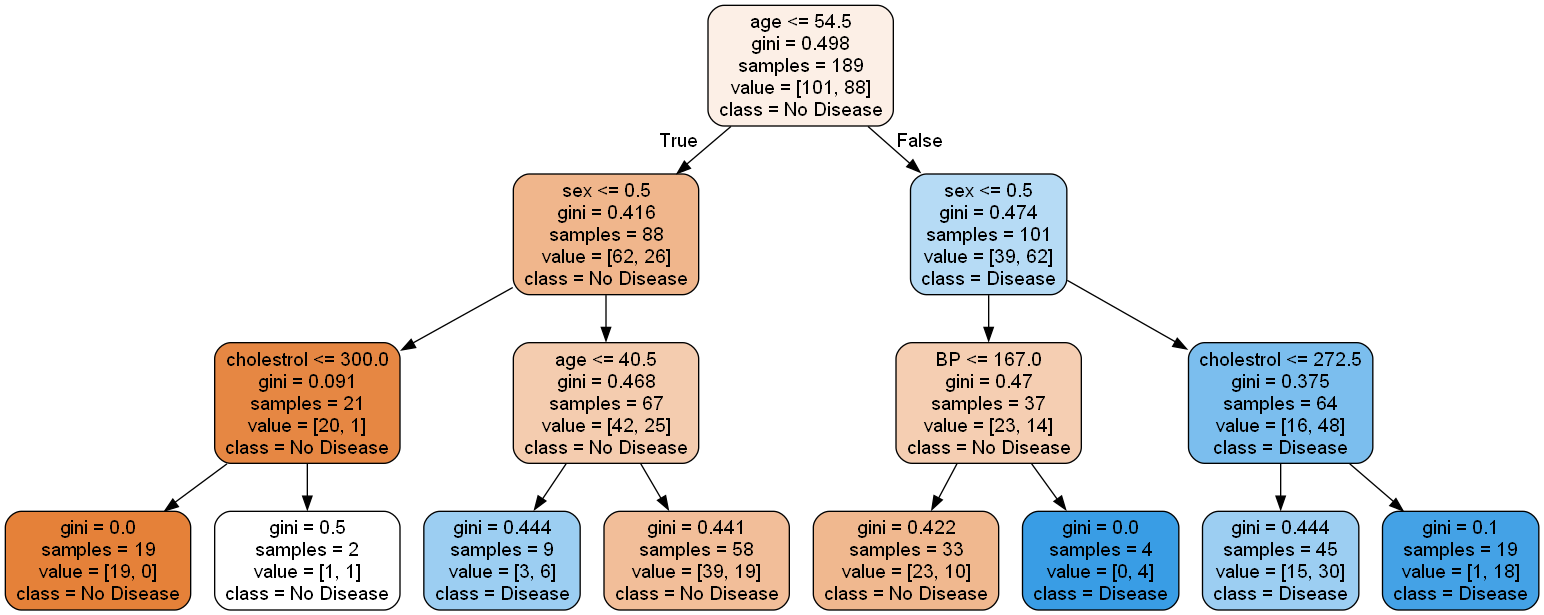

In [16]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names = X.columns,
               class_names = ['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Let's create some function to use later in the notebook.

In [17]:
def get_dt_graphs(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                   feature_names = X.columns,
                   class_names = ['No Disease', 'Disease'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
def evaluate_perfomance(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set perfomance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("Test set perfomance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

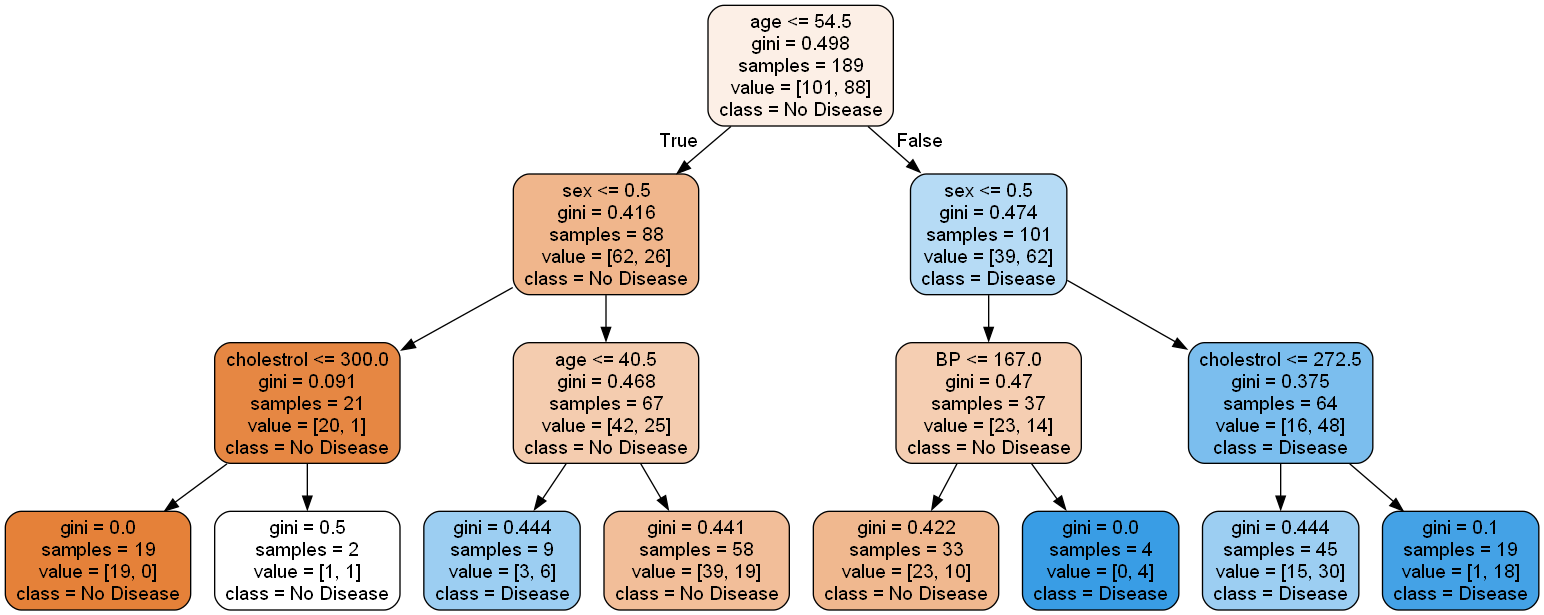

In [20]:
# Let's check the working of the functions.
graph = get_dt_graphs(dt)
Image(graph.create_png())

In [21]:
# Check the perfomence.
evaluate_perfomance(dt)

Train set perfomance
0.7407407407407407
[[82 19]
 [30 58]]
Test set perfomance
0.6049382716049383
[[35 14]
 [18 14]]


# Let's change some hyperparameters and check the model perfomence

In [22]:
dt_default = DecisionTreeClassifier(random_state  = 42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

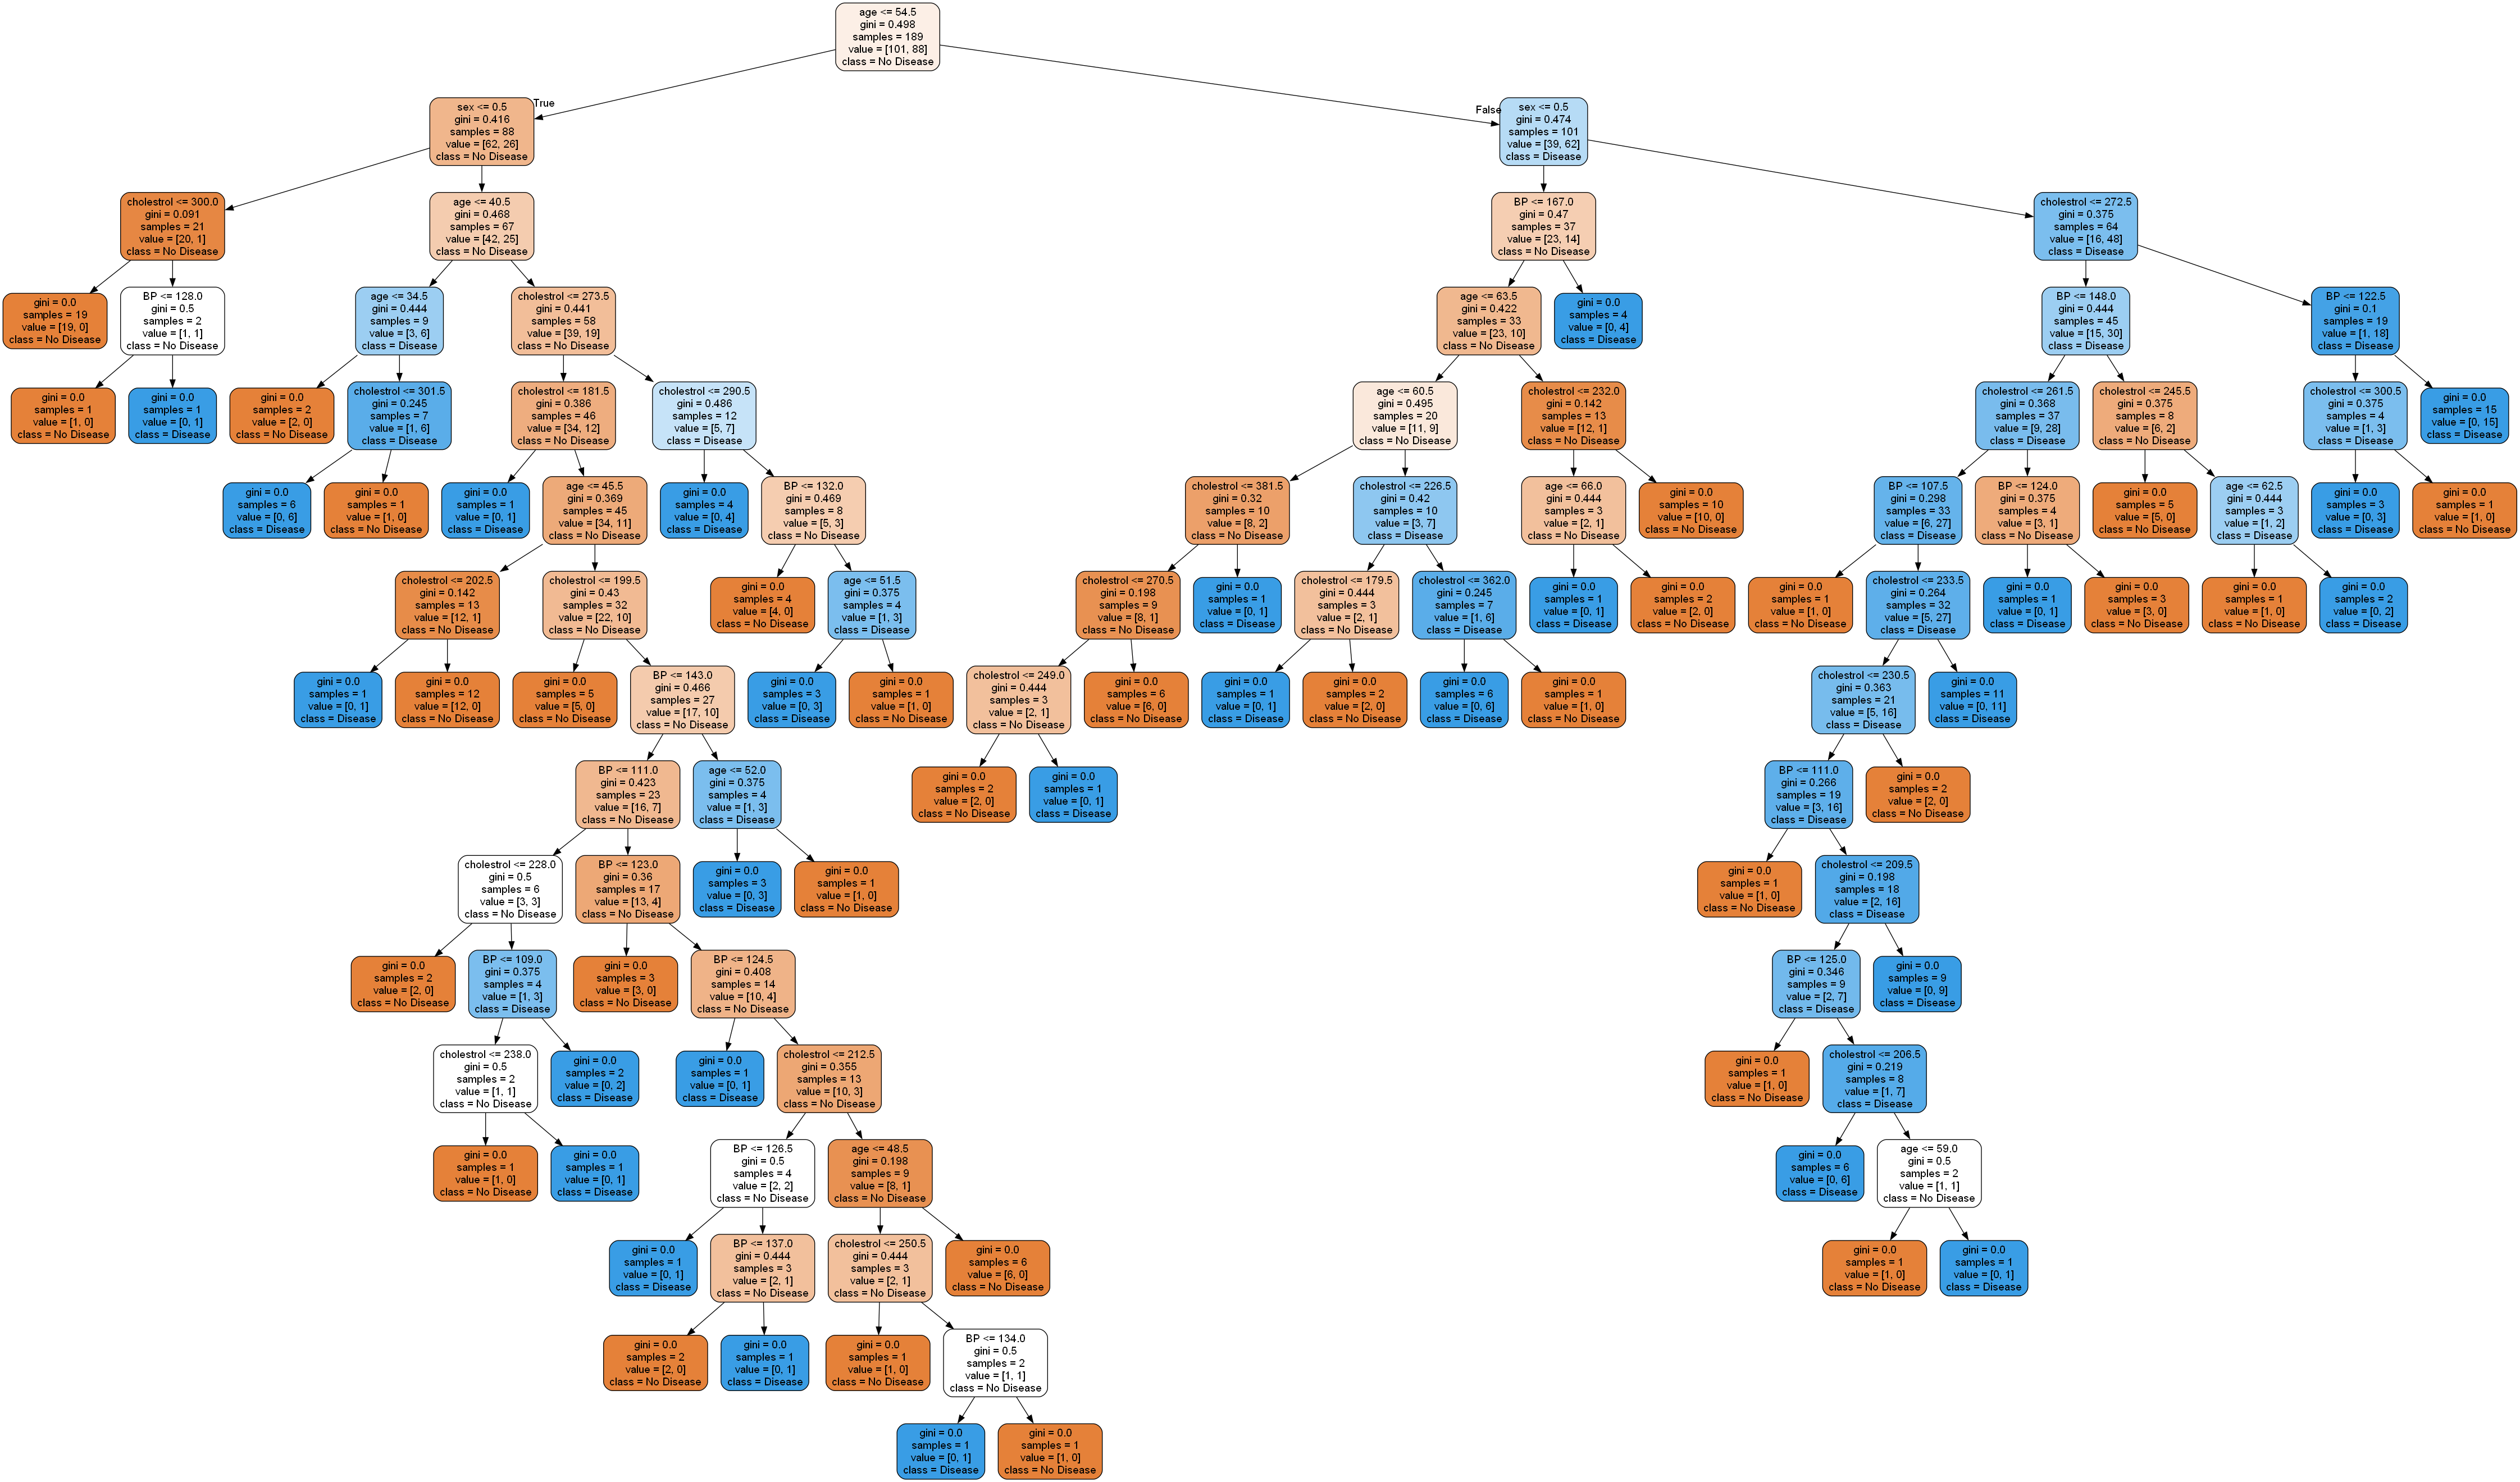

In [23]:
#plot the graphs
graph = get_dt_graphs(dt_default)
Image(graph.create_png())

In [24]:
# Let's check the accuracy.
evaluate_perfomance(dt_default)

Train set perfomance
1.0
[[101   0]
 [  0  88]]
Test set perfomance
0.6296296296296297
[[31 18]
 [12 20]]


### Here we can see that our model's accuracy is 1 for train set which indicate our model is overfit.

In [25]:
dt_default = DecisionTreeClassifier(min_samples_split=20, random_state  = 42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

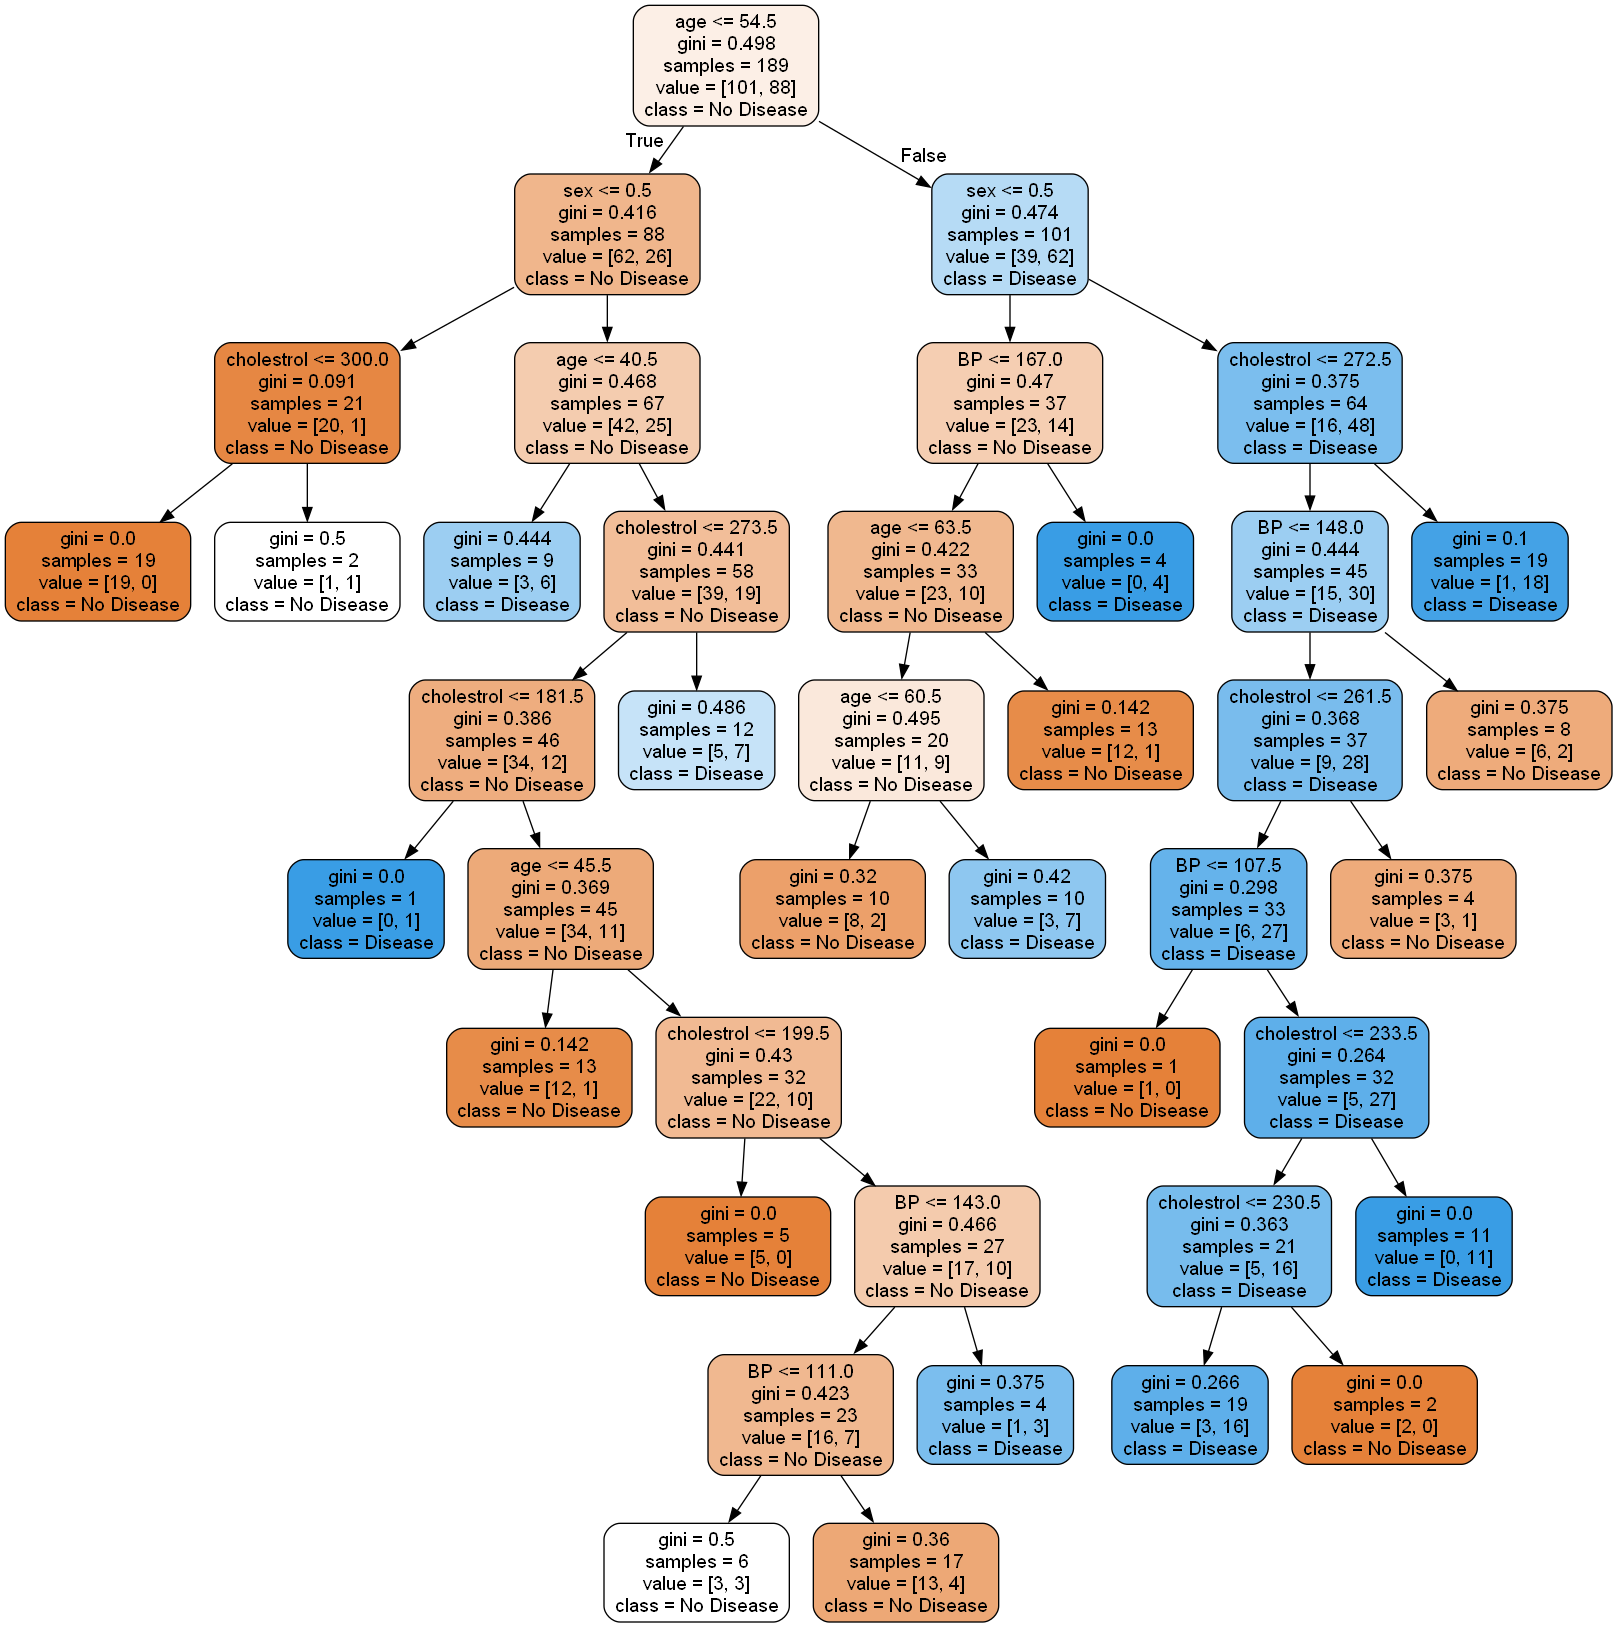

In [26]:
#plot the graphs
graph = get_dt_graphs(dt_default)
Image(graph.create_png())

In [27]:
# Let's check the accuracy.
evaluate_perfomance(dt_default)

Train set perfomance
0.8359788359788359
[[85 16]
 [15 73]]
Test set perfomance
0.6419753086419753
[[32 17]
 [12 20]]


### Here we can see that our model's accuracy is .83 for train set which indicate our model is some overfit.

In [28]:
dt_default = DecisionTreeClassifier(min_samples_leaf=20, random_state  = 42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

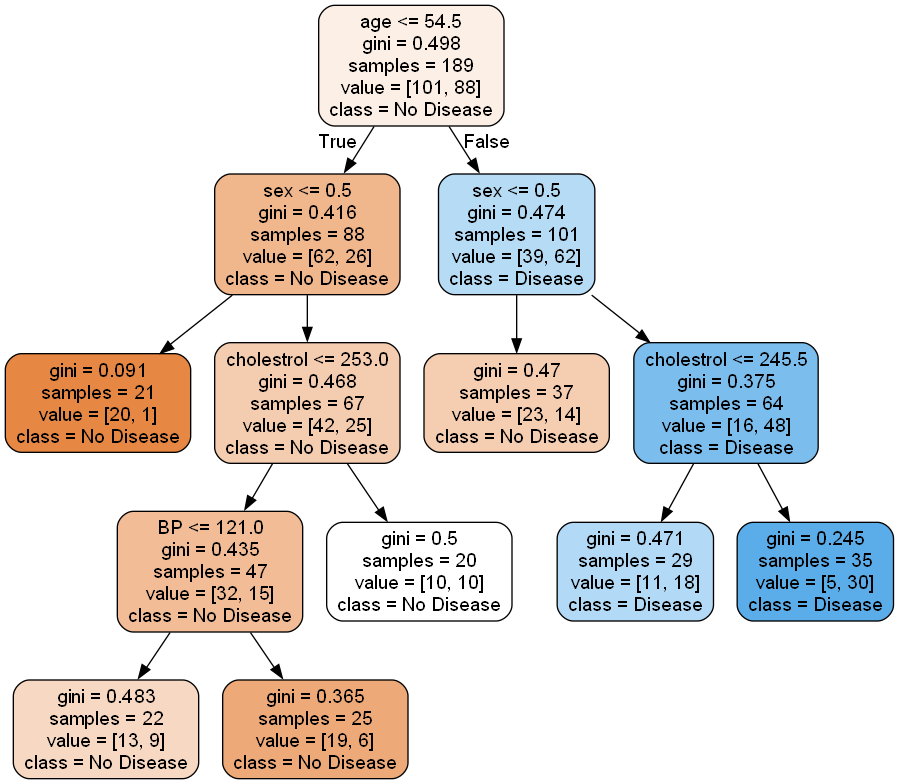

In [29]:
#plot the graphs
graph = get_dt_graphs(dt_default)
Image(graph.create_png())

In [30]:
# Let's check the accuracy.
evaluate_perfomance(dt_default)

Train set perfomance
0.7037037037037037
[[85 16]
 [40 48]]
Test set perfomance
0.6419753086419753
[[38 11]
 [18 14]]


### Here we can see that our model's accuracy is .70 for train set and 0.64 is for Test set.

# Let's change the criterian gini value to entropy value.

In [31]:
dt_default = DecisionTreeClassifier(min_samples_leaf=20, random_state  = 42, criterion='entropy')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

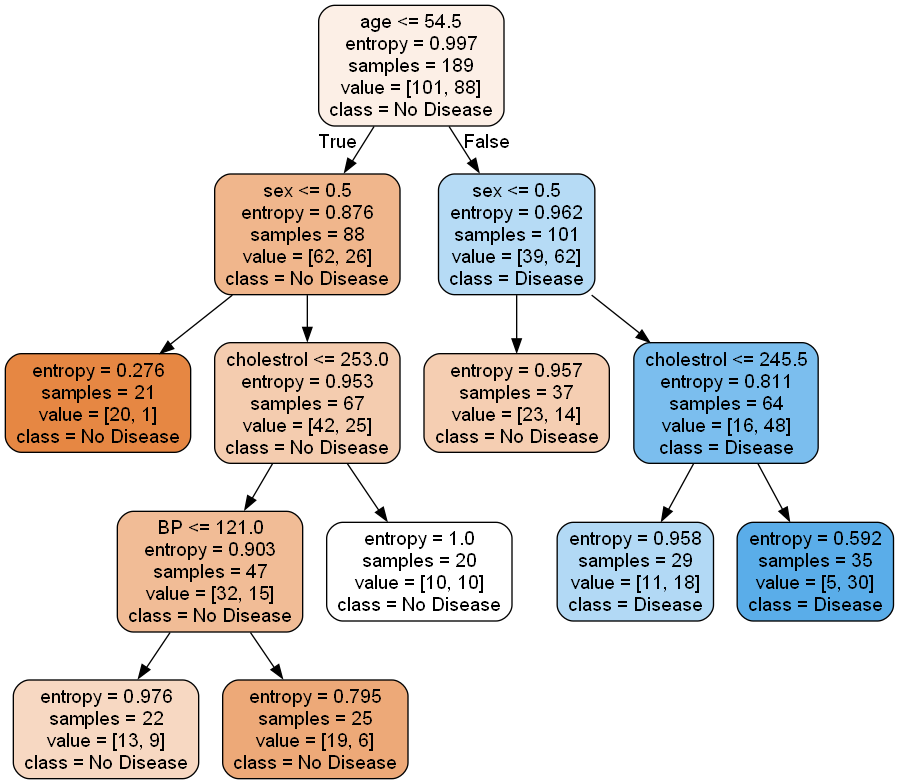

In [32]:
#plot the graphs
graph = get_dt_graphs(dt_default)
Image(graph.create_png())

In [33]:
# Let's check the accuracy.
evaluate_perfomance(dt_default)

Train set perfomance
0.7037037037037037
[[85 16]
 [40 48]]
Test set perfomance
0.6419753086419753
[[38 11]
 [18 14]]


### Here we can see that we are getting same result because gini and entropy is same.

# Let's use cross validation technique to build different mo. models and identify best model.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {
    'min_samples_split' : [2, 3, 5, 10, 20],
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'criterion':['gini', 'entropy']
}

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params, 
            cv =  4,
            n_jobs=-1,
            scoring='accuracy',
            verbose=1)

In [38]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s


Wall time: 3.37 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.3s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [39]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005381,0.000416,0.003131,0.000227,gini,5,2,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.562500,0.702128,0.595745,0.553191,0.603391,0.059160,37
1,0.005500,0.000865,0.003632,0.000658,gini,5,3,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.562500,0.702128,0.595745,0.553191,0.603391,0.059160,37
2,0.005499,0.000499,0.003251,0.000433,gini,5,5,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.562500,0.702128,0.595745,0.553191,0.603391,0.059160,37
3,0.005253,0.000438,0.003996,0.000711,gini,5,10,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.562500,0.702128,0.595745,0.553191,0.603391,0.059160,37
4,0.005265,0.000558,0.005001,0.003463,gini,5,20,"{'criterion': 'gini', 'min_samples_leaf': 5, '...",0.645833,0.765957,0.595745,0.595745,0.650820,0.069549,11


In [40]:
cv_results.shape

(50, 15)

In [41]:
cv_results.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
15,0.004259,5.564434e-04,0.002754,0.000433,gini,50,2,"{'criterion': 'gini', 'min_samples_leaf': 50, ...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1
16,0.004249,4.328101e-04,0.003000,0.000001,gini,50,3,"{'criterion': 'gini', 'min_samples_leaf': 50, ...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1
17,0.004251,4.302704e-04,0.002498,0.000500,gini,50,5,"{'criterion': 'gini', 'min_samples_leaf': 50, ...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1
18,0.004001,7.078188e-04,0.002749,0.000431,gini,50,10,"{'criterion': 'gini', 'min_samples_leaf': 50, ...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1
19,0.004001,9.610960e-07,0.002250,0.000434,gini,50,20,"{'criterion': 'gini', 'min_samples_leaf': 50, ...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1


# Let's create Decision tree regressor for regression tasks.

# We are using a assignment of multiple linear regression model. House Price prediction.

We have different factors available in our data and we have to predict the house price using that factores.
So we are using Decision tree regressore here because now we have our target column as numerical not categorical. So when we are using Decision tree Regressore we don't have any need to treat null values, remove outliers or perfoming any type of scaling on the data. We just have to pass actual data in the decision tree regressore. But if our target variable range is vary big then we have to scale or target variable.

In [42]:
# Import the libraries and datafile.
from sklearn.tree import DecisionTreeRegressor

In [43]:
df = pd.read_csv('Housing.csv')

In [44]:
df.shape

(545, 13)

In [45]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [46]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [47]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [48]:
categoricals_cols  = df.columns[df.dtypes == 'object']
categoricals_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [49]:
df[categoricals_cols]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


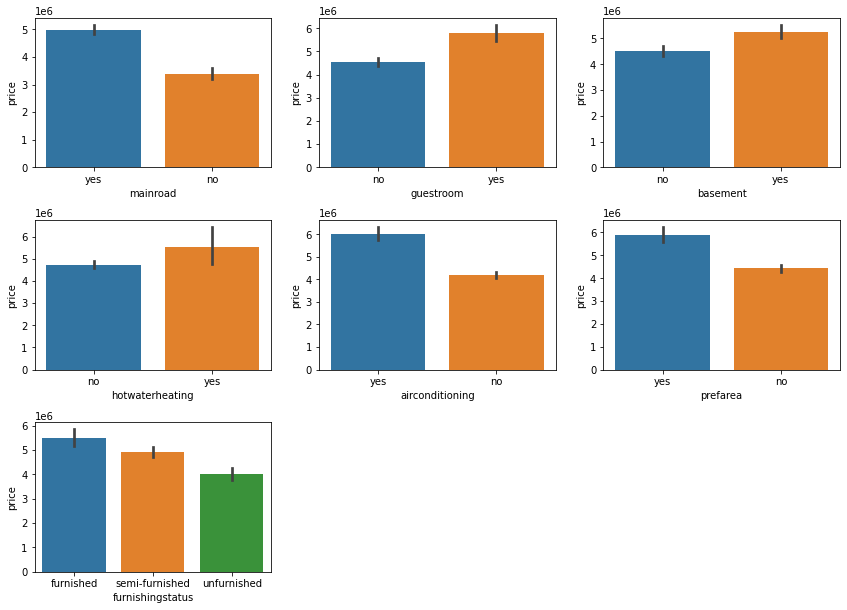

In [50]:
fig=plt.subplots(figsize=(12, 25))

for i, feature in enumerate(categoricals_cols):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x = df[feature], y = df['price'])
    plt.tight_layout()

**Comment:**

- As we can see that from the above graph furnished graphs has higher price then other category.
- Properties which have basement has higher price then properties with no basement.
- Properties which have located on main road has higher price then properties dose not located on main road.
- Properties which have guest room has higher price then properties with no guest room.
- Properties which have airconditioning facility has higher price then properties with no airconditioning facility.

### Now to treating this we have to impliment these strategy.
- ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] columns which have values in Yes, No form. So we will impute Yes as 1 and No as 0.
- 'furnishingstatus' column which have 3 values so we have to perfome dummie values creation for this column.


In [51]:
cols_1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in cols_1:
    df[i] = df[i].map({'yes' : 1, 'no' : 0})

In [52]:
df[cols_1]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [53]:
### Creating dummie values....
dummey_df = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, dummey_df], axis=1)
df = df.drop('furnishingstatus', axis = 1)

In [54]:
# Now let's split the data into train and test set.
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)

In [55]:
df_train.shape, df_test.shape

((381, 14), (164, 14))

In [56]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,0,1
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,0,0
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1,0
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,1,0
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,0,0


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [58]:
# now let's scale our target variable for train and test data.
df_train['price'] = scaler.fit_transform(df_train[['price']])
df_test['price'] = scaler.transform(df_test[['price']])

In [59]:
df_train.price.describe()

count    381.000000
mean       0.286896
std        0.169026
min        0.000000
25%        0.166667
50%        0.250667
75%        0.380000
max        1.000000
Name: price, dtype: float64

In [60]:
df_test.price.describe()

count    164.000000
mean       0.288264
std        0.198242
min        0.000000
25%        0.149167
50%        0.240000
75%        0.390000
max        1.100000
Name: price, dtype: float64

#### As we have scaled our target variable. Now it's time to split our train and test set data into X and y set for both the set.

In [61]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [62]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
126,7160,3,1,1,1,0,1,0,0,2,1,0,1
363,3584,2,1,1,1,0,0,1,0,0,0,1,0
370,4280,2,1,1,1,0,0,0,1,2,0,1,0
31,7000,3,1,4,1,0,0,0,1,2,0,1,0
113,9620,3,1,1,1,0,1,0,0,2,1,0,0


In [63]:
y_train.head()

126    0.393333
363    0.186667
370    0.180000
31     0.633333
113    0.412667
Name: price, dtype: float64

In [64]:
# Let's create a Decision tree regressore model with max_depth = 4 and min_samples_leaf = 10.
dt_classifier = DecisionTreeRegressor(random_state=42, min_samples_leaf=10, max_depth=4)

In [65]:
# Let's fit our decision tree model on train set.
dt_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

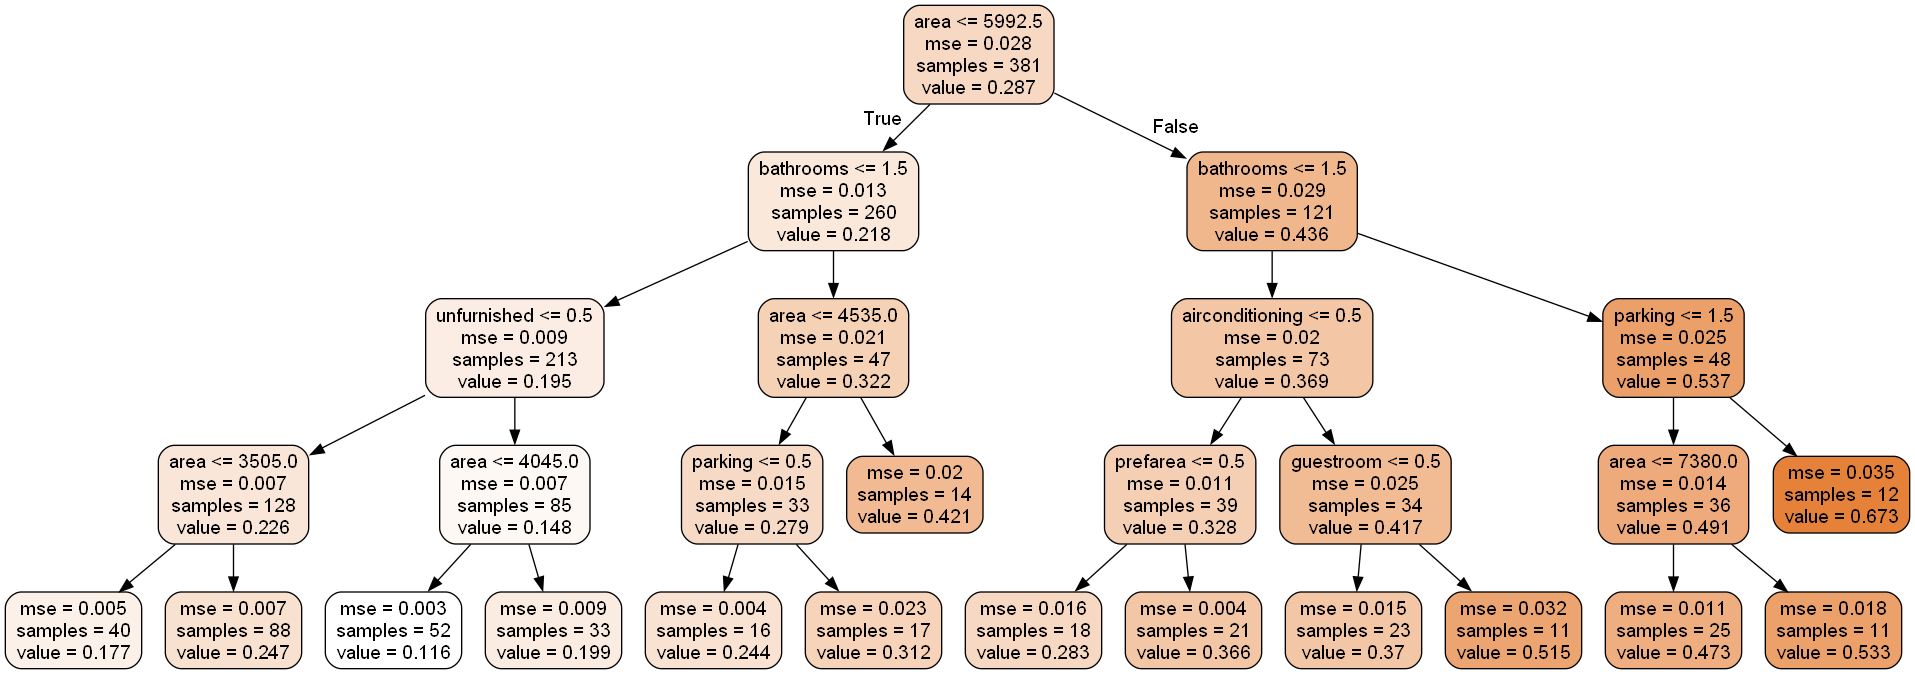

In [66]:
dot_data = StringIO()

export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
               feature_names = X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [67]:
from sklearn.metrics import r2_score

In [68]:
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)
print("Train set perfomance")
print(r2_score(y_train, y_train_pred))
print("Test set perfomance")
print(r2_score(y_test, y_test_pred))

Train set perfomance
0.632438607965429
Test set perfomance
0.5091459780528691
